#Regression with keras
<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build a regression model.</h5>
<h5> 2. Download and Clean dataset </h5>
<h5> 3. Build a Neural Network </h5>
<h5> 4. Train and Test the Network. </h5>  

In [130]:
#import library
import pandas as pd
import numpy as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


In [131]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [132]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values

In [133]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [134]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors and target
The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [135]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [136]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [137]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [138]:
#Normalize data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [139]:
n_cols = predictors_norm.shape[1] # number of predictors
print(n_cols)
print((n_cols,))

8
(8,)


In [140]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Build a Neural Network

In [141]:
#define regression model
def regression_model():
  #create model
  model=Sequential()
  model.add(Dense(50,activation='relu',input_shape=(n_cols,)))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(1)) #output
  #compile model
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

### Train and Test the Network

In [142]:
# build the model
model = regression_model()
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 0s - loss: 1633.3124 - val_loss: 1111.0077
Epoch 2/100
23/23 - 0s - loss: 1492.8362 - val_loss: 959.0380
Epoch 3/100
23/23 - 0s - loss: 1259.0725 - val_loss: 721.9980
Epoch 4/100
23/23 - 0s - loss: 913.9460 - val_loss: 450.8257
Epoch 5/100
23/23 - 0s - loss: 542.9761 - val_loss: 247.1529
Epoch 6/100
23/23 - 0s - loss: 301.0461 - val_loss: 170.5835
Epoch 7/100
23/23 - 0s - loss: 220.9772 - val_loss: 163.3196
Epoch 8/100
23/23 - 0s - loss: 204.5965 - val_loss: 166.2876
Epoch 9/100
23/23 - 0s - loss: 194.1638 - val_loss: 166.5168
Epoch 10/100
23/23 - 0s - loss: 187.3029 - val_loss: 165.3952
Epoch 11/100
23/23 - 0s - loss: 180.9479 - val_loss: 166.4165
Epoch 12/100
23/23 - 0s - loss: 175.9431 - val_loss: 164.7896
Epoch 13/100
23/23 - 0s - loss: 172.7521 - val_loss: 164.7323
Epoch 14/100
23/23 - 0s - loss: 167.9271 - val_loss: 162.2240
Epoch 15/100
23/23 - 0s - loss: 165.0842 - val_loss: 160.9113
Epoch 16/100
23/23 - 0s - loss: 161.9294 - val_loss: 160.8251
Epoch 17/100


Referrence: https://keras.io/api/models/

# Classification Models with keras
<h2>Classification Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. Use of MNIST database for training various image processing systems</h5>
<h5> 2. Build a Neural Network </h5>
<h5> 3. Train and Test the Network. </h5>

<p>This link will be used by your peers to assess your project. In your web app, your peers will be able to upload an image, which will then be classified using your custom classifier you connected to the web app. Your project will be graded by how accurately your app can classify <b>Fire</b>, <b>Smoke</b> and <b>Neutral (No Fire or Smoke)</b>.<p>


In [143]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
# import the data
from keras.datasets import mnist

In [144]:
# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

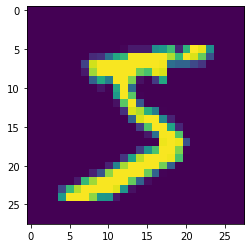

In [145]:
plt.imshow(X_train[0])

In [146]:
# flatten images into one-dimensional vector
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector
print(num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

784


In [147]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [148]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


##Build a Neural Network

In [149]:
#define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

###Train and Test the Network

In [150]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 9s - loss: 0.1849 - accuracy: 0.9439 - val_loss: 0.0971 - val_accuracy: 0.9703
Epoch 2/10
1875/1875 - 8s - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0785 - val_accuracy: 0.9763
Epoch 3/10
1875/1875 - 8s - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0828 - val_accuracy: 0.9752
Epoch 4/10
1875/1875 - 8s - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0731 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 - 8s - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0870 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 - 8s - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0886 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 - 8s - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0907 - val_accuracy: 0.9792
Epoch 8/10
1875/1875 - 8s - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0883 - val_accuracy: 0.9785
Epoch 9/10
1875/1875 - 8s - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0850 - val_accuracy: 0.9802
Epoch 10/10
1875/1875 - 8s - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.1062 - 

In [151]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.975600004196167% 
 Error: 0.024399995803833008


In [152]:
model.save('classification_model.h5')

In [154]:
from keras.models import load_model
pretrained_model = load_model('classification_model.h5')